<div style="text-align: right">Created by: Goutham Kumar R <br/>Notebook created on: 25th December 2020</div>

### Table of Contents:
* Understanding of K-means
* Understanding Inertia and elbow curve
* Clustering colours from an Image
* Deployment

In [15]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# ML lib
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

### K-Means Overview:
K-Means is one of the basic unsupervised machine learning algorithm. It relies on finding clusters based on minimising the sum of squared errors(inertia) between each datapoints and its cluster centroid.
> Limitation: Depends on the starting point of the centroid and the number of cluster(k) has to be defined beforehand.

In [16]:
# a fn to display cluster
def display_cluster(X, km=[], clusters=0):
    """
    A helper function to display the cluster in 2-D space, Based on the cluster no. it highlights the groups
    Arguments:
            X: Datapoints (numpy array)
           km: K-means algo after fit(This fn will access km.labels and highlights the clusters)
     clusters: Default arguments=0 ; Specifiy the no. of clusters
     Returns:
             Scatterplot for the datapoints
    """
    
    colour = "brgcmyk"   # diff colours for diff clusters
    
    if clusters == 0:     #if #clusters=0, then display scatter plot with one colour
        plt.scatter(X[:,0],X[:,1], c=colour[0])   
    else:
        for i in range(clusters):                                       #based on the kmeans labels, 
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1], c=colour[i]) #the clusters will be highlighted with different colours

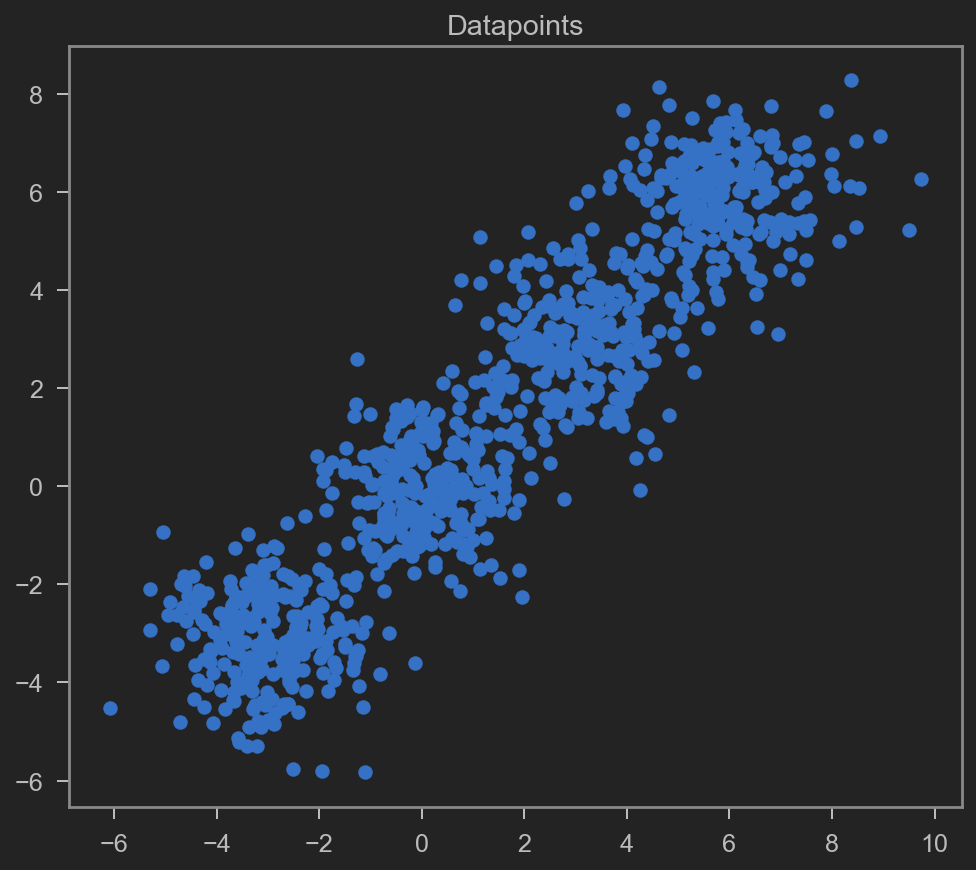

In [27]:
# Creating a dataset using blob to illustrate clustering
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]  #center of the blobs
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=7)
display_cluster(X)
plt.title("Datapoints"); #semicolin at the end, helps to avoid the matplotlib text

We can clearly see, that there are 4 clusters.

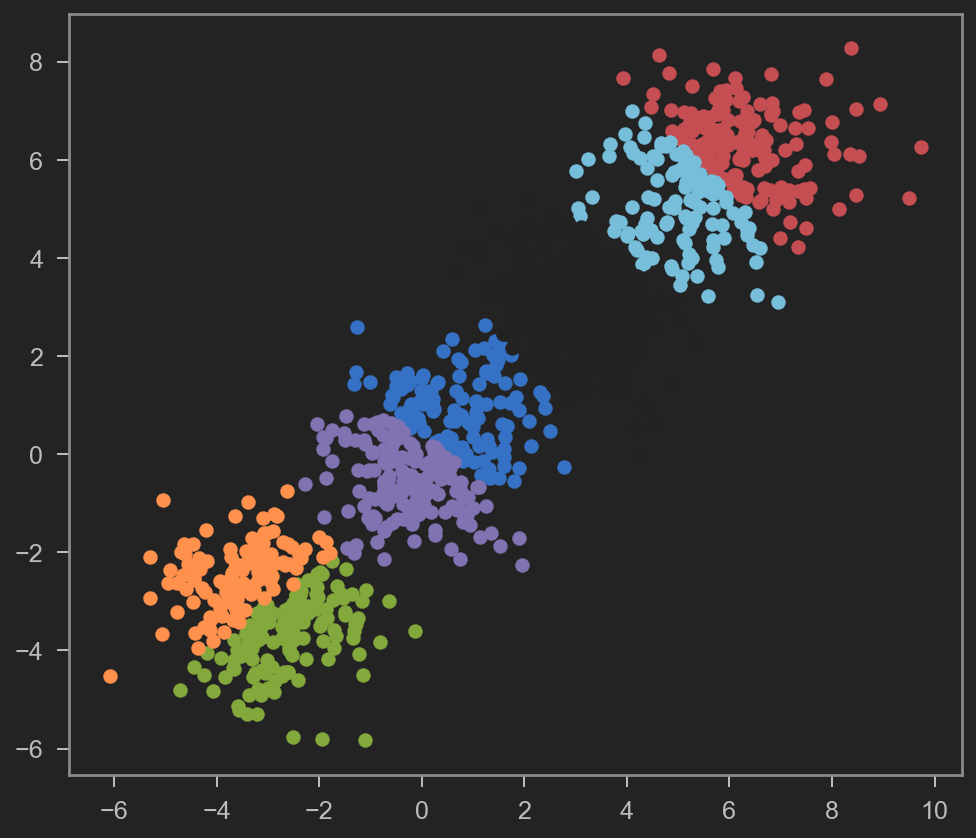

In [19]:
# Lets fit k-Means with 7 clusters
clusters = 7
km = KMeans(n_clusters=clusters)   #calling K-means
km.fit(X)   #fitting the algo on our datapoints
display_cluster(X, km, clusters=7)

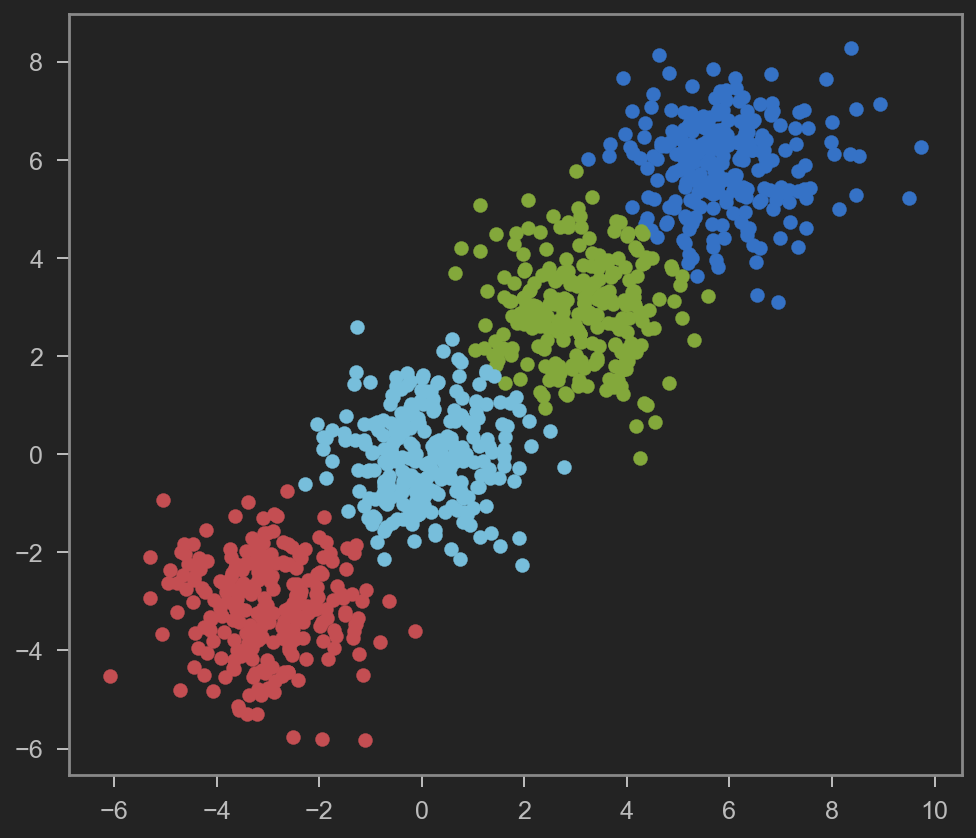

In [20]:
# Now lets fit K-means with 4 clusters
clusters = 4
km = KMeans(n_clusters=clusters)
km.fit(X)
display_cluster(X,km,clusters=4)

#### 4 or 7?
* Here we obsereved that visually 4 clusters is better than 7, We could view the data in 2-D space easily; But real-world data usualy have high dimensions. For this we have to plot the inertia.
> inertia: (sum of squared error between each point and its cluster center) as a function of the number of clusters.


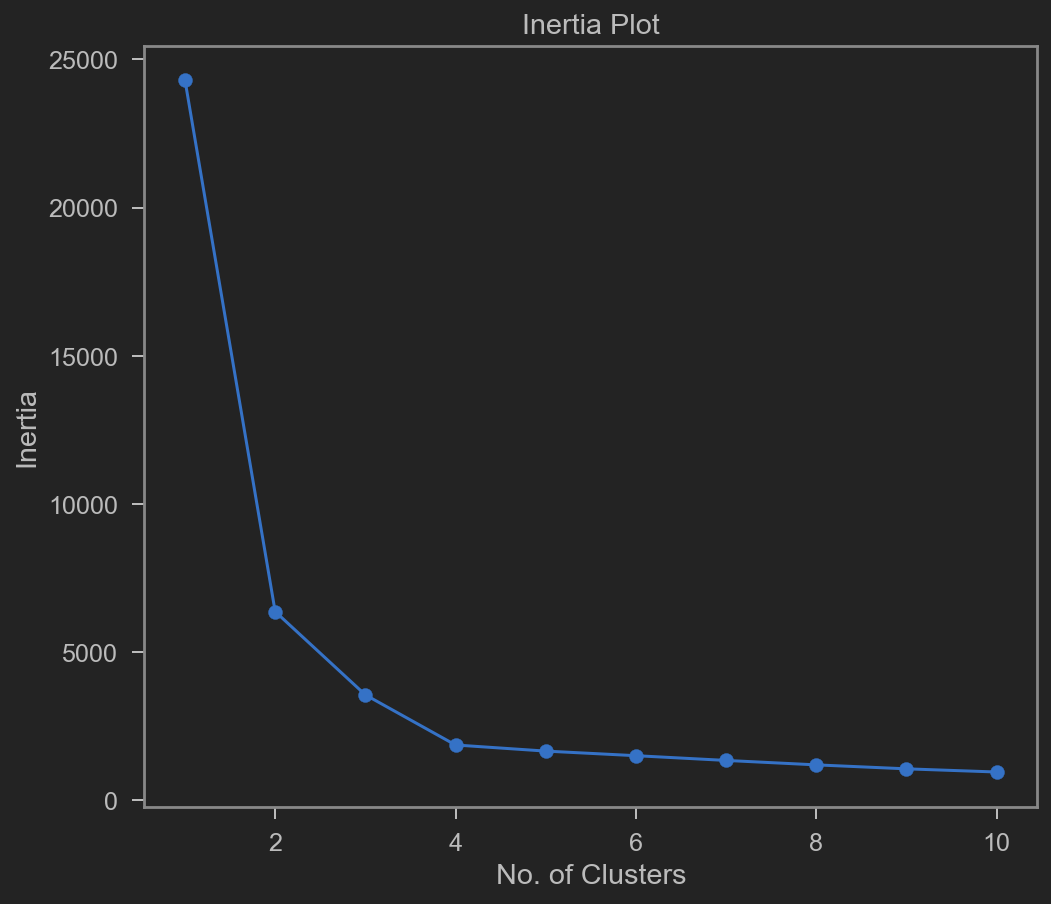

In [50]:
# elbow curve
inertia =[]
no_clusters = list(range(1,11))
for n in no_clusters:
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertia.append(km.inertia_)
    
#plot Inertia vs different #clusters
plt.plot(no_clusters,inertia)
plt.scatter(no_clusters,inertia)
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia Plot");

From the elbow curve(inertia plot) we can see that, 4 is the optimum no. of clusters for this datapoints

## Clustering Colours from an Image:

Why? Image Clustering

Image Segmentation is the process of partitioning an image into multiple different regions(or segments). The goal is to change the representation of the image into an easier and more meaningful image.

It is an important step in image processing, as real world images doesn't always contain only one object that we wanna classify. For instance, for self driving cars, the image would contain the road, cars, pedestrians etc., So we may need to use segmentation here to separate objects and analyze each object individually (i.e,. Image classifiaction) to check what it is.

Steps:
* Read the image
* Flatten the image
* Fit K-Means
* Reshape it again to original form


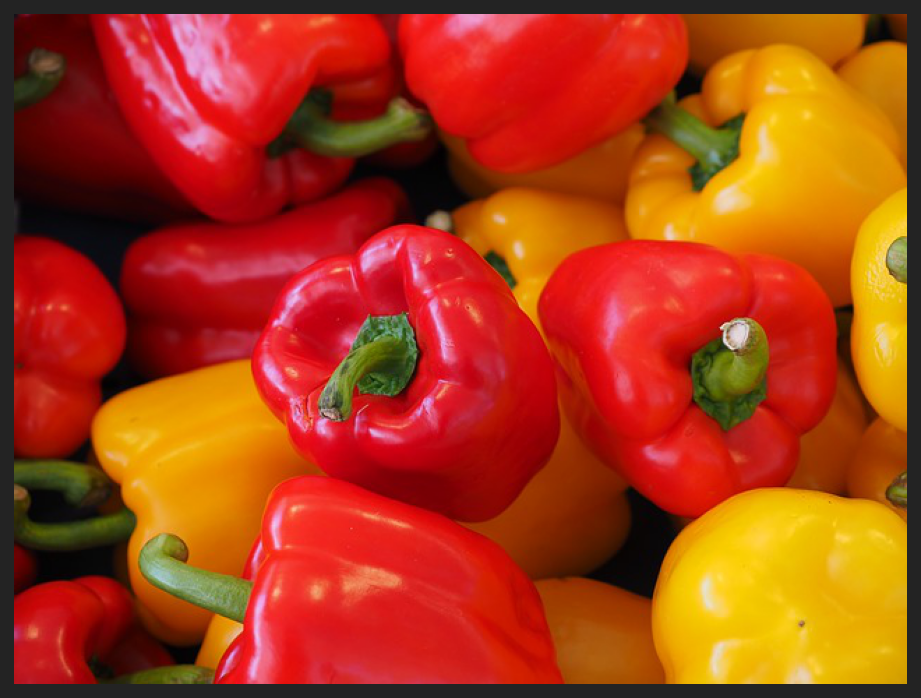

In [25]:
img_peppers = plt.imread('data/peppers.jpg') #reading the image
plt.imshow(img_peppers) 
plt.axis("off"); #turning off axis, 

In [28]:
img_peppers.shape

(480, 640, 3)

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has.

In [31]:
# First we will reshape the image into a table that has a pixel per row and each column represents the red, green and blue channel.
img_flat = img_peppers.reshape(img_peppers.shape[0]*img_peppers.shape[1],3)
img_flat[:5,:]

array([[15, 18, 25],
       [26, 16, 24],
       [42, 15, 22],
       [65, 16, 22],
       [85, 14, 22]], dtype=uint8)

In [32]:
img_flat.shape

(307200, 3)

Since there are 480x640 pixels we get 307,200 rows! 

In [43]:
# Lets fit K-Means with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=7)
kmeans.fit(img_flat)

KMeans(n_clusters=7, random_state=7)

In [44]:
# Lets replace the each row with its closest cluster center.
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

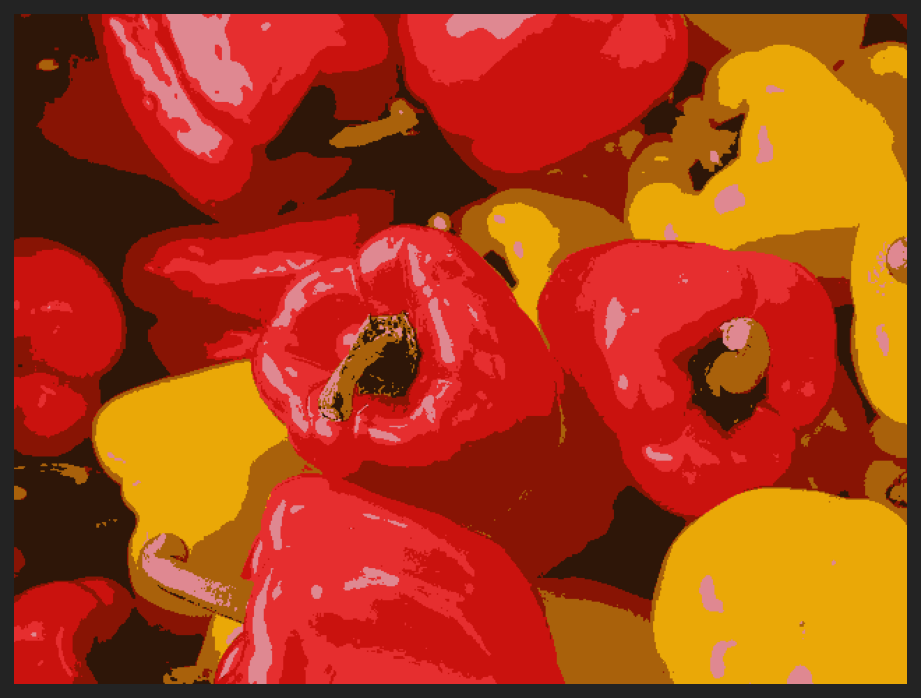

In [45]:
# Now lets reshape the data from 307200 to 480*640
img_peppers_kmeans = img_flat2.reshape(img_peppers.shape)
plt.imshow(img_peppers_kmeans)
plt.axis('off');

 Somewhat we clustered the image, Let's try to improve it

## User friendly: Colour Clustering

In [46]:
#a fn for clustering colours from the image
def image_cluster(img, k):
    """
    Reshapes the image, flattens it, fits K-Means algo then reconstructs the image.
    Arguments:
          img: Image file
            k: K value for K-means clustering 
    Returns:
       img2: Reconstucted image
    inertia: K-Means inertia, if you want to plot screeplot
    """
    #flatten the original image and fit K-Means algo
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    #reshaping the flattend image to original shape   
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

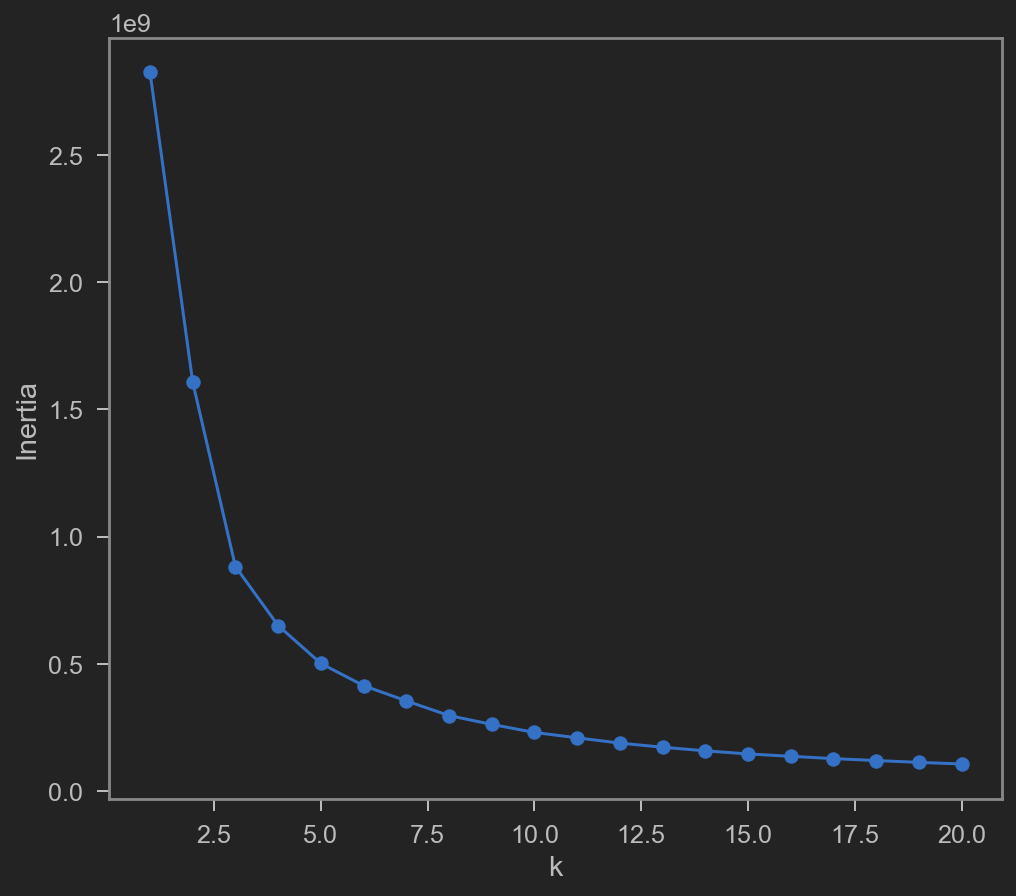

In [49]:
#inertia plot
k_values = list(range(1,21))
img_list = []
inertia = []
for k in k_values:
    img2, ine = image_cluster(img_peppers,k)
    img_list.append(img2)
    inertia.append(ine)  
#plot
plt.plot(k_values,inertia)
plt.scatter(k_values,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

Sometimes, the elbow method does not yield a clear decision (for example, if the elbow is not clear and sharp).  In such cases, alternatives such as the [silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) can be helpful.

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong clusters

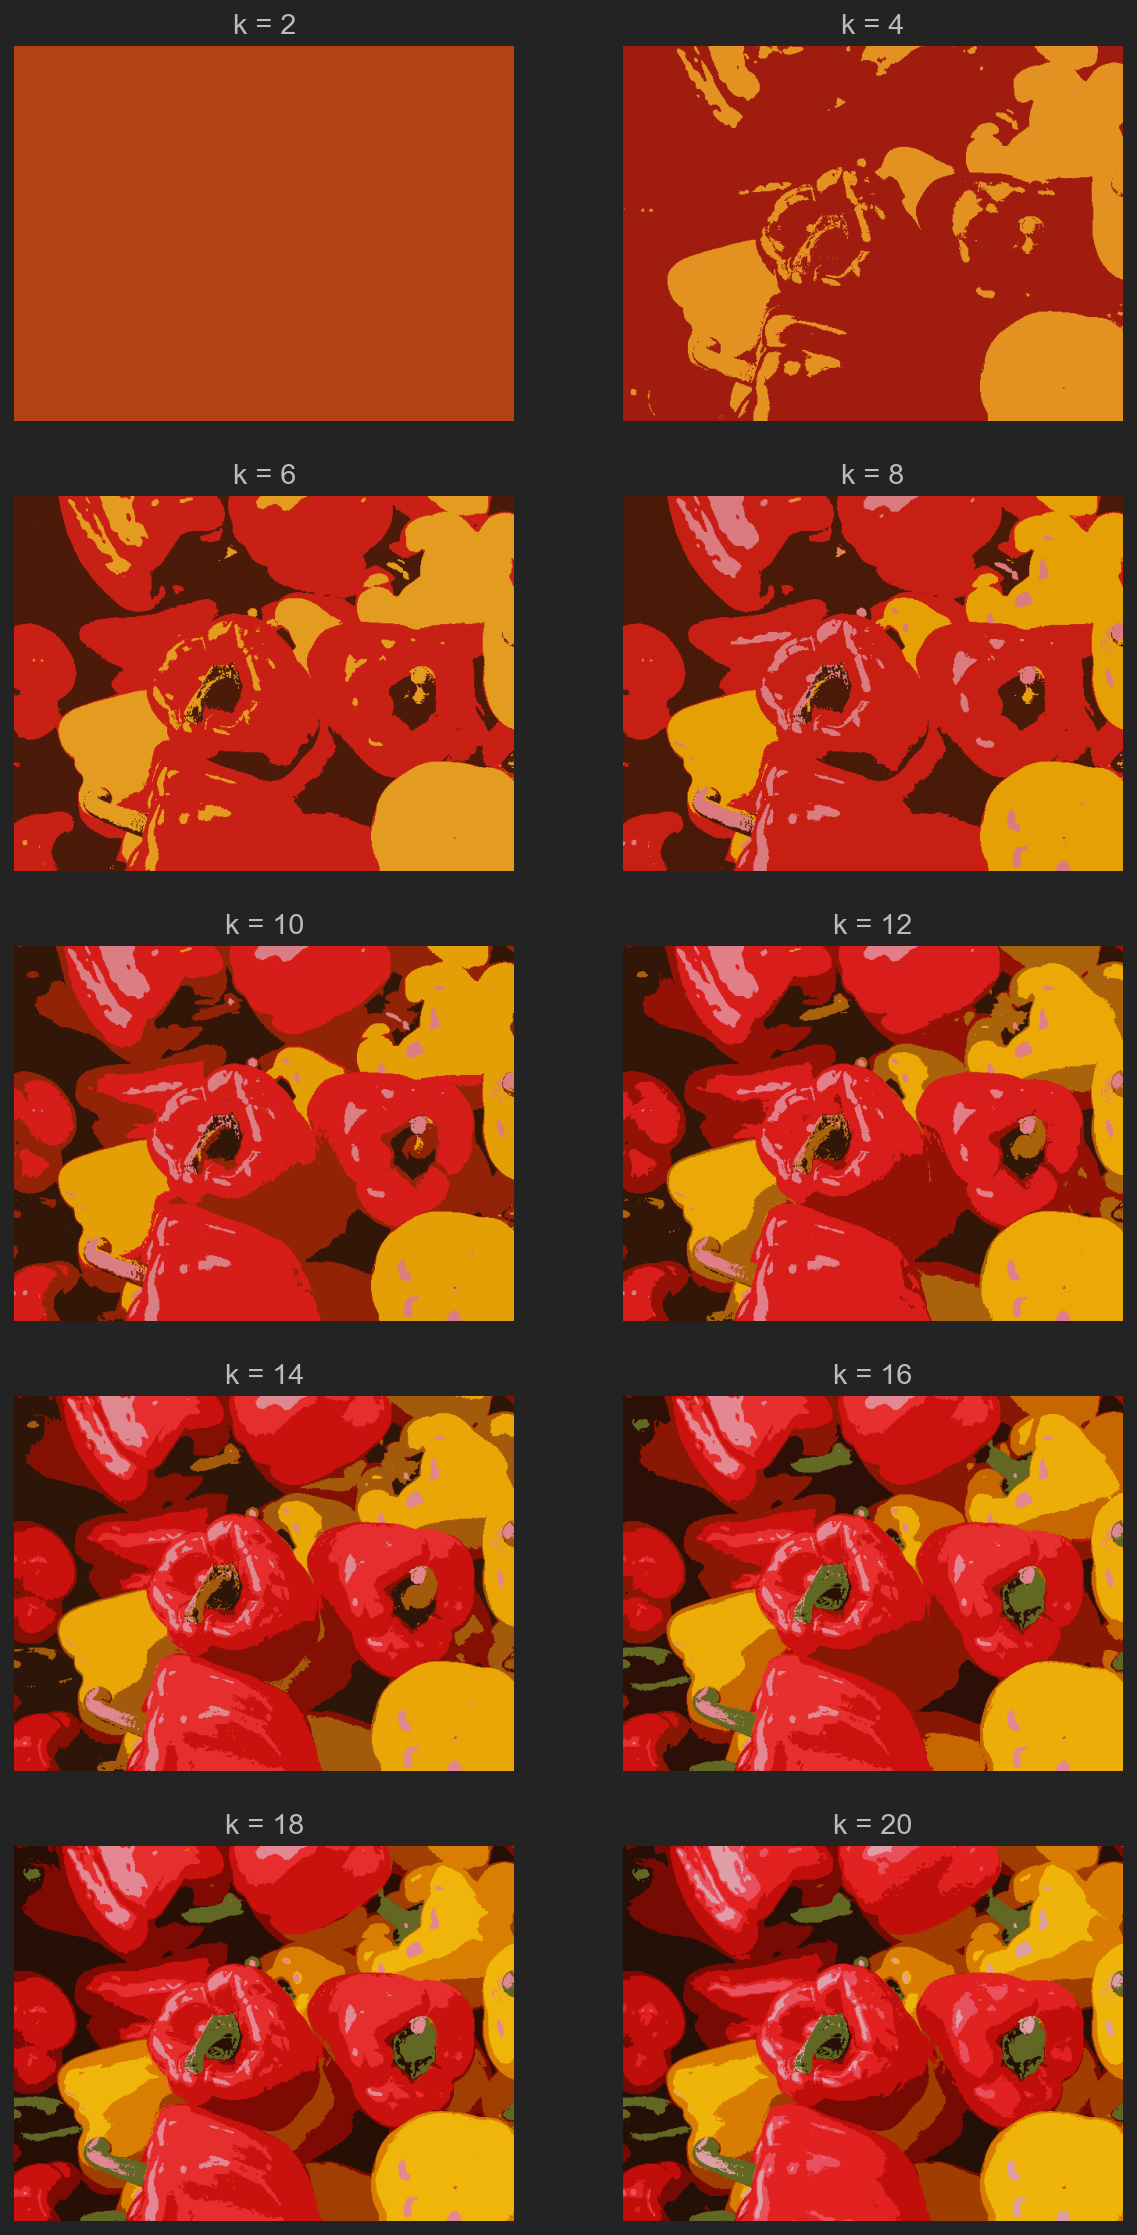

In [65]:
#Plotting all the grid images for different value of k(Kmeans clsutering)
plt.figure(figsize=[10,20])
k_values = list(range(2,21,2))
for i in range(len(k_values)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_values[i]))
    plt.axis('off');

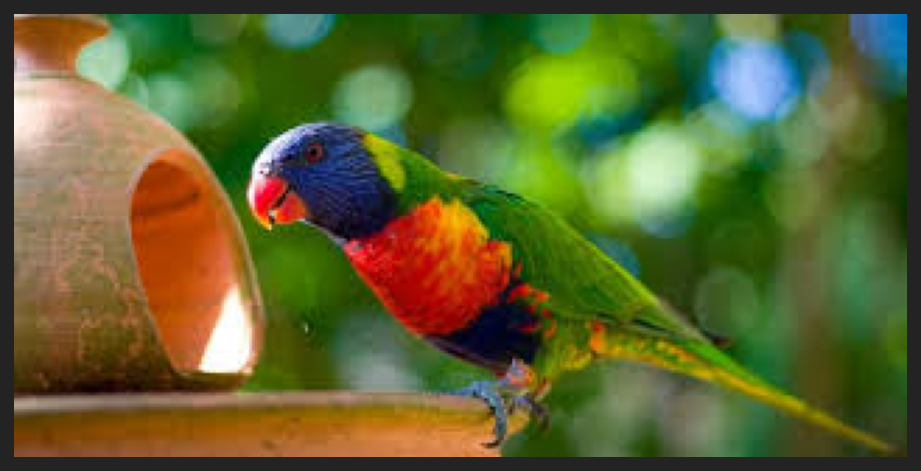

In [56]:
#checking for different image
img_parrot = plt.imread("data/parrot.jpg")
plt.imshow(img_parrot)
plt.axis("off");

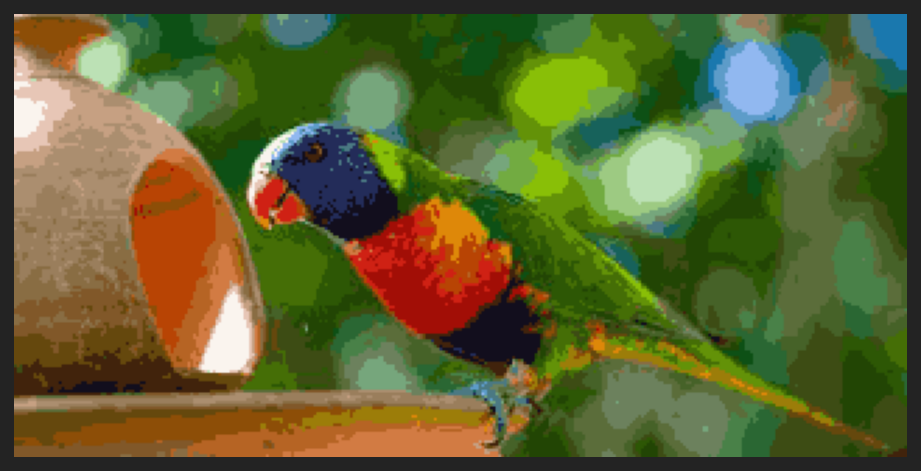

In [57]:
img2,k = image_cluster(img_parrot,40)
plt.imshow(img2)
plt.axis("off");

In [72]:
import os
files = os.listdir("data/")
files

['bee.jpg', 'flowers.jfif', 'parrot.jpg', 'peppers.jpg']

### Referneces:
* IBM Machine Learning course
* Sklearn documentation

### Improvements:
* Implement silhoutte score
* Read files automatically from directory and convert the files based on user i/p